## Maximum Likelihood Lab

In this lab we will look at the DMV waiting time example from the class. Let's look at the following situation:

You want to find out how long your mom will have to wait at the DMV. In order to determine the waiting time you stayed at the DMV for a while and measured the waiting time for the customers. You were playing on your phone and so you missed to to measure the exact time. Thus you started to collect the waiting times in the form (5, 0.3), which in this example means that the waiting time was somewhere between 5-0.3 and 5+0.3 minutes. 

Now that you have your data you want to build a model. You now assume that all waiting times $W_i$ are distributed with the same **but unknown** gamma distribution with **fixed but unknown** hyperparameters $\alpha$ and $\beta$ and that all waiting times $W_i$ are independent and thus

$$P_{(\beta, \alpha)}(W_1 \in A_1, W_2 \in A_2, ..., W_N \in A_N) = \Gamma_{(\beta, \alpha)}(W_1 \in A_1)\Gamma_{(\beta, \alpha)}(W_2 \in A_2)... \Gamma_{(\beta, \alpha)}(W_N \in A_N)$$

Please take a moment and think about the 3 major assumptions:
1. The waiting times are independet.
2. All waiting times are distributed from the same type of distribution.
3. We are certain that the hyperparameters take one specific value. We just don't know which one it is. 

**Exercise 1:**

Create a lambda expression for the Gamma distribution. You will need the gamma function $\Gamma$ which is available in the scipy.special package. Plot the Gamma distribution for 4 different combinations of $\beta$ and $\alpha$ onto the same graph. Describe how the hyperparameters $\beta$ and $\alpha$ change the shape of the distribution.

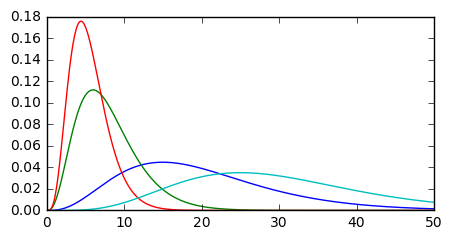

In [2]:
import numpy as np
from math import factorial
from matplotlib import pyplot as plt
from scipy.special import gamma
from scipy.integrate import quad
%matplotlib inline

#create gamma probabality distribution equation
Gamma = lambda a,b : lambda x: (b**a)*(x**(a-1))*(np.exp(-x*b))/gamma(a)   #a, b are hyperparameters beta and alpha
X = np.arange(0,50,.1)   #vector zero to 50 by steps of .1
a = [4,4,5,6]
b = [0.2,0.5,0.9,0.2]
conj = zip(a,b)   #create tuples of alpha and beta
fig, ax = plt.subplots(1,1,figsize=(5,2.5))
for c in conj:   #for alpha beta tuple
    ax.plot(X,Gamma(*c)(X))   #plot the gamma function over the 'X' range for as many tuples


                                   



**Exercise 2:**

The data points that you collected are in the below list denoted by waiting_time. Each of the tuples in the list represents an intervall of time that you measured. You can now use the below data points to calculate the probability of the measured intervalls as a function of $(\beta, \alpha)$

$$(\beta, \alpha) \to P_{(\beta, \alpha)}( W_1 \in [3.8,4.2), W_2 \in [3.5, 4.5), W_3 \in [4.1, 5.9), ...)$$

Create a lambda expression that maps every pair $(\beta, \alpha)$ onto the probability and craete a 3D plot. You will need to use numpy.vectorize to vectorize the lambda expression. Numpy converts the lambda expression so that it can take numpy arrays as arguments. Look into last weeks notes to find out how to plot a 3D plot.

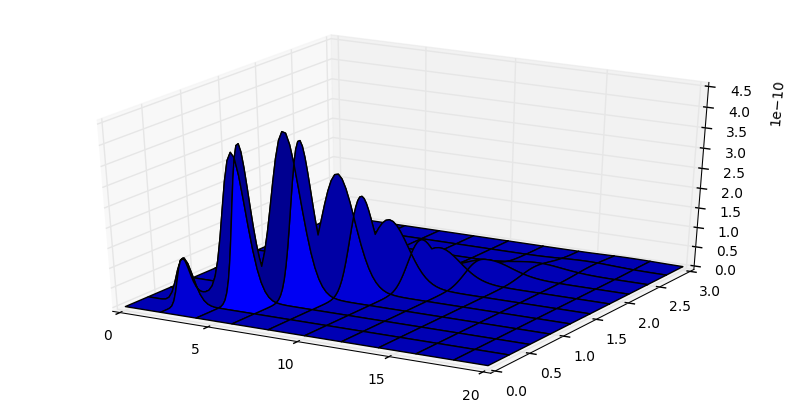

In [3]:
from mpl_toolkits.mplot3d import Axes3D
working_time =[(4,0.2),(4,0.5), (5,0.9), (6,0.2), (4,0.2), (6,0.2), (5,0.6), (15,0.6)]   
Gamma = lambda a,b : lambda x: (b**a)*(x**(a-1))*(np.exp(-x*b))/gamma(a)   #gamma function per previous exercise
X = np.arange(0,50,.1)
prob = np.vectorize(lambda y,z: quad(Gamma(y,z), 3.8, 4.2)[0]*
                    quad(Gamma(y,z), 3.5, 4.5)[0]*
                    quad(Gamma(y,z), 4.1, 5.9)[0]*
                    quad(Gamma(y,z), 5.8, 6.2)[0]*
                    quad(Gamma(y,z), 3.8, 4.2)[0]*
                    quad(Gamma(y,z), 5.8, 6.2)[0]*
                    quad(Gamma(y,z), 4.4, 5.6)[0]*
                    quad(Gamma(y,z), 14.4, 15.6)[0])   #create numpy vector of the probabilities of events given certain alpha and beta parameters

alphas = np.linspace(0.01,20, 100)   #alpha parameters
betas = np.linspace(0.01,3, 100)   #beta parameters
alphas, betas = np.meshgrid(alphas,betas)   #creates grid of alpha and beta parameters
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,1,1, projection = '3d')
ax1.plot_surface(alphas, betas, prob(alphas, betas))   #plot 3 dimensional graph, iterating through tuples

**Exercise 3:**

Each of the points $(\beta, \alpha)$ represents a model that we could pick and the plot shows us how likely the measured waiting times are if we would have fixed $(\beta, \alpha)$ at the respective values. We now have to make a decision which pair $(\beta, \alpha)$ we want to pick. One way to approach this decision problem is to pick the $(\beta, \alpha)$ pair which produces the highest probability for the measured event. This approach is called **Maximum Likelihood**. 

Use the minimize function in the scipy.optimize package to find the maximum likelihood. You will have to change the function so that the maximum becomes the minimum. Additionally, minimize only takes functions of one variable. You will have to change your function so that it takes a list as an argument and not two numbers. minimize looks for a minimum around an initial point x0. You will have to provide such a point. Use method = 'Nelder-Mead'. 

See below for an example of how to use minimize.

In [8]:
from scipy.optimize import minimize

prob1 = lambda a: -prob(a[0], a[1])   #inverting 3 dimensional graph from prev. example and using a list and indexing to fulfill argument amounts
x0 = [5,.1]   #our beginning point to begin looking for minimum
funxMin = minimize(prob1, x0, method = 'Nelder-Mead')   #use minimize function on inverted probability space
print "alpha: %f beta: %f" %(funxMin.x[0], funxMin.x[1]) #print alpha beta combination with highest probability of modeling data points best

alpha: 4.958371 beta: 0.810434


**Exercise 4:**

Now that we have our maximum likelihood solution we can take a step back and think about what we just did. 

* Take a look at the plot and remind yourself that minimize looks for a solution around an initial point x0. What's the problem with that?
* We assumed that the outcome that we measured is the outcome with the hightest probability. Take a look at the actual probability of getting what we measured under the assumption of the model. How likely was it? 
* Take a moment and check out what outliers are. How do those data points effect the solution in light of the above point and why?
* Can you think of a way to make a better decision?

In [29]:
#The problem is that we need to choose an initial point, and depending on what we choose, and the contours of the graph
#, we can end up with a local minimum but that might not be the actual minimum

#Looking at the graph it looks likely because the if you look where on the alpha, beta grid the spikes are highest, 
#the intersection looks very near the alpha and beta parameters that best model the data. 

prob(4.958, 0.810)
#The numerical number is small, but looking at our 3d graph it matches up well with the highest point in that model. 

#There was one outlier in the graph that probably lowered the probability that the data was modeled by this particular 
#alpha and beta.





4.14235268976385e-10

**Exercise 5:**

Plot the distribution of the maximum likelihood solution together with a normed histogram of the waiting times. What can you observe and how does this relate to Exercise 4?

(array([ 0.85227273,  0.        ,  0.56818182,  0.        ,  0.56818182,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.28409091]),
 array([  4.  ,   4.44,   4.88,   5.32,   5.76,   6.2 ,   6.64,   7.08,
          7.52,   7.96,   8.4 ,   8.84,   9.28,   9.72,  10.16,  10.6 ,
         11.04,  11.48,  11.92,  12.36,  12.8 ,  13.24,  13.68,  14.12,
         14.56,  15.  ]),
 <a list of 25 Patch objects>)

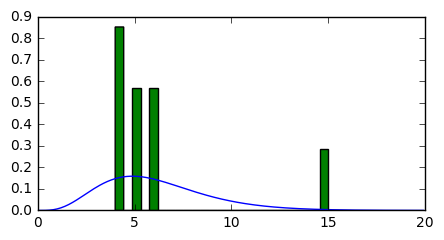

In [45]:
Gamma = lambda a,b : lambda x: (b**a)*(x**(a-1))*(np.exp(-x*b))/gamma(a) #again, gamma distribution
histval = [x for x, a in working_time]   #list of the mean of the probable waiting times at DMV 
X = np.arange(0,20,.1)
fig, ax = plt.subplots(1,1,figsize=(5,2.5))
ax.plot(X, Gamma(4.958, 0.810)(X))   #plot gamma probability ditribution with alpha, beta parameters from Maximum Likelihood
ax.hist(histval, normed = 1, bins=25)   #plot histogram of list of probable waiting times at DMV



**Exercise 6:**

Calculate the Mean and the Variance of the maximum likelihood distribution using integration. Remember: The Mean of the distribution $E[W]$ is the expected waiting time and the square root of the variance $\sqrt{Var[W]}$ is the expected range of waiting times.

In [9]:
MLD = lambda x: (0.810**4.958)*(x**(4.958-1))*(np.exp(-x*0.810))/gamma(4.958)   #MLD is gamma function with alpha and beta from Maximum Likelihood plugged in
mean = quad(lambda x :x * MLD(x), 0, np.inf)[0]   #expected value *weighted average from integrating MLD over 0 to infinity
print "mean: %s" %(mean)

sd = (quad(lambda x: ((x - mean)**2)*MLD(x), 0, np.inf)[0])**(1/2)   #standard deviation, the second moment
print "standard deviation: %s" %(sd)


mean: 6.12098765432
standard deviation: 1.0


**Exercise 7:**

Use the minimize function to calculate the waiting time with the hightest probability and its respective probability. Compare your result to the result of Exercise 6. Does this make you think about a better decision methedology for $(\beta, \alpha)$?

In [11]:
prob2 = lambda a: -MLD(a)   #invert MLD
x0 = 4
funxMin = minimize(prob2, x0, method = 'Nelder-Mead')
funxMin.x
print "wait time: %f" %(funxMin.x[0])   #search in MLD the lowest point of probability distribution curve
probability = (0.810**4.958)*(4.886**(4.958-1))*(np.exp(-4.886*0.810))/gamma(4.958)   #calculate probability using value and MLD function
print "probability: %f" %(probability)

wait time: 4.886426
probability: 0.159050
